In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
import api_keys

from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
CountryList = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    Country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code    
    
    if city not in cities:
        cities.append(city)
        CountryList.append(Country)

# Print the city count to confirm sufficient count
print(f'Length of Cities: \n{len(cities)}')
# print(f'\nCities: \n{cities}')

# Create a dictionary of the cities
cities_dic = {"City": cities, "Country": CountryList}

# Create a data frame of the cities
cities_df = pd.DataFrame(cities_dic)
print(f'\nCities Data Frame:')
cities_df.head()

Length of Cities: 
599

Cities Data Frame:


,City,Country
0,hilo,us
1,bluff,nz
2,hobart,au
3,brae,gb
4,port elizabeth,za


## Perform API Calls

In [7]:

# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = f'http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid={api_key}'

In [8]:
RowCount = 0

print(f'\nRetrieve Weather Data:')

# for index, row in cities_df.head().iterrows(): ## print 5 cities only during development
for index, row in cities_df.iterrows(): ## print 5 cities only during development
    
    City = row["City"]
    target_url = f'{url}&q={City}' 
#     print({target_url})

    response = requests.get(target_url)
    response_json = response.json()
    
# pprint(response_json)

    print(f'{"*"*20}')
    print(f'\nRetrieve city #{RowCount + 1}: {cities_df.loc[index]["City"]}')
    print(f'URL: {target_url}')


    RowCount = RowCount + 1
    
    try:
        cities_df.set_value(index, "Date", response_json["dt"])
        cities_df.set_value(index, "Lat", response_json["coord"]["lat"])
        cities_df.set_value(index, "Lng", response_json["coord"]["lon"])
        cities_df.set_value(index, "Max Temperature (F)", response_json["main"]["temp_max"])
        cities_df.set_value(index, "Humidity", response_json["main"]["humidity"])
        cities_df.set_value(index, "Cloudiness", response_json["clouds"]["all"])
        cities_df.set_value(index, "Wind Speed", response_json["wind"]["speed"])
        
    except:
        print("Exception: Missing data point(s)")
  
    # Perform modulus to print out 100 cities before pausing
    if RowCount % 100 == 0:
        print(f'{"*"*20}')
        print(f'\nPause: 30 seconds\n')
        time.sleep(30)

print(f'{"*"*20}')        
print(f'\nRetrieval complete\n')
print(f'{"*"*20}')


Retrieve Weather Data:
********************

Retrieve city #1: hilo
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=hilo


C:\Users\diamo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\diamo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\diamo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\diamo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\diamo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future rele

********************

Retrieve city #2: bluff
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=bluff
********************

Retrieve city #3: hobart
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=hobart
********************

Retrieve city #4: brae
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=brae
********************

Retrieve city #5: port elizabeth
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=port elizabeth
********************

Retrieve city #6: rikitea
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=rikitea
********************

Retrieve city #7: klaksvik
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=klaksvik
************

********************

Retrieve city #51: faanui
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=faanui
********************

Retrieve city #52: port alfred
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=port alfred
********************

Retrieve city #53: illoqqortoormiut
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=illoqqortoormiut
Exception: Missing data point(s)
********************

Retrieve city #54: jamestown
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=jamestown
********************

Retrieve city #55: samusu
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=samusu
Exception: Missing data point(s)
********************

Retrieve city #56: jalalabad
URL: http://api.openweathermap.o

********************

Retrieve city #99: faya
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=faya
********************

Retrieve city #100: bonthe
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=bonthe
********************

Pause: 30 seconds

********************

Retrieve city #101: kwinana
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=kwinana
********************

Retrieve city #102: wanning
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=wanning
********************

Retrieve city #103: estelle
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=estelle
********************

Retrieve city #104: kapaa
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63b

********************

Retrieve city #146: san quintin
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=san quintin
********************

Retrieve city #147: mahebourg
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=mahebourg
********************

Retrieve city #148: hami
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=hami
********************

Retrieve city #149: pisco
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=pisco
********************

Retrieve city #150: kruisfontein
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=kruisfontein
********************

Retrieve city #151: filadelfia
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b

********************

Retrieve city #194: blagoyevo
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=blagoyevo
********************

Retrieve city #195: tadine
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=tadine
********************

Retrieve city #196: serebryansk
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=serebryansk
********************

Retrieve city #197: cam ranh
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=cam ranh
********************

Retrieve city #198: saint-philippe
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=saint-philippe
********************

Retrieve city #199: aklavik
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7

********************

Retrieve city #242: merauke
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=merauke
********************

Retrieve city #243: acari
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=acari
********************

Retrieve city #244: asfi
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=asfi
Exception: Missing data point(s)
********************

Retrieve city #245: haines junction
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=haines junction
********************

Retrieve city #246: vanimo
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=vanimo
********************

Retrieve city #247: pascagoula
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcb

********************

Retrieve city #290: boyolangu
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=boyolangu
********************

Retrieve city #291: pierre
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=pierre
********************

Retrieve city #292: palabuhanratu
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=palabuhanratu
Exception: Missing data point(s)
********************

Retrieve city #293: bud
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=bud
********************

Retrieve city #294: pingxiang
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=pingxiang
********************

Retrieve city #295: la romana
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0e

********************

Retrieve city #338: broken hill
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=broken hill
********************

Retrieve city #339: ambon
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=ambon
********************

Retrieve city #340: xinzhou
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=xinzhou
********************

Retrieve city #341: buluang
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=buluang
********************

Retrieve city #342: sitka
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=sitka
********************

Retrieve city #343: ferme-neuve
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=ferme-ne

********************

Retrieve city #386: pilos
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=pilos
Exception: Missing data point(s)
********************

Retrieve city #387: banda aceh
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=banda aceh
********************

Retrieve city #388: anloga
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=anloga
********************

Retrieve city #389: nome
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=nome
********************

Retrieve city #390: sinnamary
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=sinnamary
********************

Retrieve city #391: matay
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63be

********************

Retrieve city #434: tracy
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=tracy
********************

Retrieve city #435: umm lajj
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=umm lajj
********************

Retrieve city #436: kaniama
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=kaniama
********************

Retrieve city #437: sioux lookout
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=sioux lookout
********************

Retrieve city #438: belmonte
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=belmonte
********************

Retrieve city #439: ye
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=ye
Ex

********************

Retrieve city #482: port blair
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=port blair
********************

Retrieve city #483: ranong
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=ranong
********************

Retrieve city #484: saint-etienne
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=saint-etienne
********************

Retrieve city #485: viedma
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=viedma
********************

Retrieve city #486: ust-tsilma
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=ust-tsilma
********************

Retrieve city #487: cartagena
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5

********************

Retrieve city #530: santa cruz
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=santa cruz
********************

Retrieve city #531: almaznyy
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=almaznyy
********************

Retrieve city #532: eugene
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=eugene
********************

Retrieve city #533: tautira
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=tautira
********************

Retrieve city #534: peruibe
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=peruibe
********************

Retrieve city #535: mulege
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=mulege


********************

Retrieve city #578: magadan
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=magadan
********************

Retrieve city #579: yellandu
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=yellandu
********************

Retrieve city #580: synya
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=synya
********************

Retrieve city #581: soe
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=soe
********************

Retrieve city #582: werda
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=werda
********************

Retrieve city #583: yumen
URL: http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=0ed1fcbcd6016f63beee7e6c5e93547b&q=yumen
********************



#Organize Data

In [9]:
cities_df.head(20)

,City,Country,Date,Lat,Lng,Max Temperature (F),Humidity,Cloudiness,Wind Speed
0,hilo,us,1.532707e+09,19.71,-155.08,73.40,78.0,75.0,4.70
1,bluff,nz,1.532712e+09,-23.58,149.07,53.21,90.0,0.0,5.41
2,hobart,au,1.532711e+09,-42.88,147.33,48.20,66.0,40.0,10.29
3,brae,gb,1.532710e+09,60.40,-1.35,64.40,88.0,20.0,27.51
4,port elizabeth,za,1.532710e+09,39.31,-74.98,86.00,70.0,8.0,6.93
5,rikitea,pf,1.532712e+09,-23.12,-134.97,73.69,100.0,68.0,8.21
6,klaksvik,fo,1.532710e+09,62.23,-6.59,59.00,93.0,36.0,18.34
7,severo-kurilsk,ru,1.532712e+09,50.68,156.12,54.43,94.0,64.0,4.18
8,ponta do sol,cv,1.532712e+09,-20.63,-46.00,76.61,39.0,0.0,5.41
9,coquimbo,cl,1.532707e+09,-29.95,-71.34,55.40,71.0,75.0,5.82


In [11]:

#Drop columns with missing variables
cities_df = cities_df.dropna()
cities_df.head()

,City,Country,Date,Lat,Lng,Max Temperature (F),Humidity,Cloudiness,Wind Speed
0,hilo,us,1.532707e+09,19.71,-155.08,73.40,78.0,75.0,4.70
1,bluff,nz,1.532712e+09,-23.58,149.07,53.21,90.0,0.0,5.41
2,hobart,au,1.532711e+09,-42.88,147.33,48.20,66.0,40.0,10.29
3,brae,gb,1.532710e+09,60.40,-1.35,64.40,88.0,20.0,27.51
4,port elizabeth,za,1.532710e+09,39.31,-74.98,86.00,70.0,8.0,6.93


In [15]:

#Convert "Date" to DATETIME
cities_df['Date'] = pd.to_datetime(cities_df['Date'], unit='s')
cities_df.head()

,City,Country,Date,Lat,Lng,Max Temperature (F),Humidity,Cloudiness,Wind Speed
0,hilo,us,2018-07-27 15:53:00,19.71,-155.08,73.40,78.0,75.0,4.70
1,bluff,nz,2018-07-27 17:11:46,-23.58,149.07,53.21,90.0,0.0,5.41
2,hobart,au,2018-07-27 17:00:00,-42.88,147.33,48.20,66.0,40.0,10.29
3,brae,gb,2018-07-27 16:50:00,60.40,-1.35,64.40,88.0,20.0,27.51
4,port elizabeth,za,2018-07-27 16:54:00,39.31,-74.98,86.00,70.0,8.0,6.93


##CREATE SCATTER PLOT

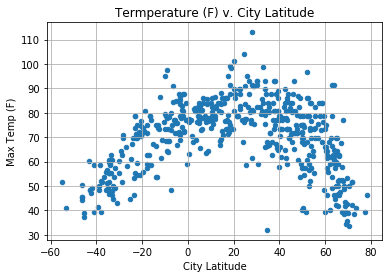

In [16]:
##Chart: Temperature (F) vs. Latitude Scatter Plot
cities_df.plot.scatter(["Lat"], ["Max Temperature (F)"], marker ='o', alpha = 1, grid = True)

# Chart details
plt.title("Termperature (F) v. City Latitude")
plt.xlabel("City Latitude")
plt.ylabel("Max Temp (F)")

# Save an image of the chart and print to screen
plt.savefig("")
plt.show()

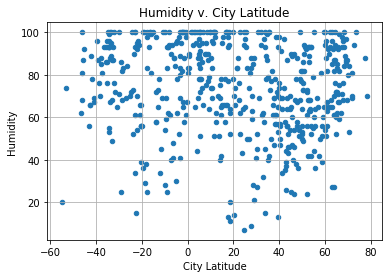

In [18]:
##Chart: Humidity (%) vs. Latitude
cities_df.plot.scatter(["Lat"], ["Humidity"], marker ='o', alpha = 1, grid = True)

# Chart details
plt.title("Humidity v. City Latitude")
plt.xlabel("City Latitude")
plt.ylabel("Humidity")

# Save an image of the chart and print to screen
plt.savefig("")
plt.show()

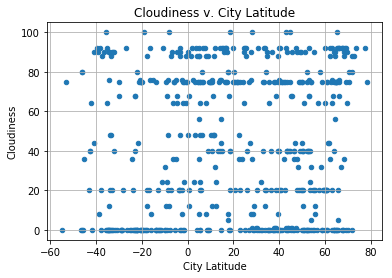

In [19]:
##Chart: Cloudiness (%) vs. Latitude
cities_df.plot.scatter(["Lat"], ["Cloudiness"], marker ='o', alpha = 1, grid = True)

# Chart details
plt.title("Cloudiness v. City Latitude")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")

# Save an image of the chart and print to screen
plt.savefig("")
plt.show()

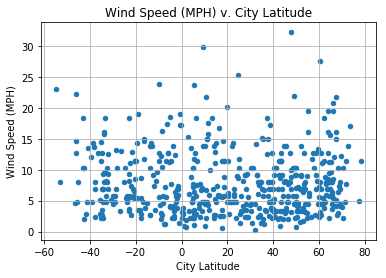

In [21]:
##Chart: Wind Speed (mph) vs. Latitude
cities_df.plot.scatter(["Lat"], ["Wind Speed"], marker ='o', alpha = 1, grid = True)

# Chart details
plt.title("Wind Speed (MPH) v. City Latitude")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (MPH)")

# Save an image of the chart and print to screen
plt.savefig("")
plt.show()